## This notebook preents three different approaches to using chained models.

1. Linear models with polynomials
2. Neural networks with feature scaling
3. Linear models with dummies.

In [1]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['39A'][3]
models = []
scalers = []
all_dummies = []

In [2]:
for v in routes['39A']:
    print(v[0])

 Ongar
 Aston Quay
 Bachelor's Walk
 UCD
 Ongar
 UCD


In [12]:
len(routes['39A'][0])

73

### It seems like our r2 scores plunge in particular when we pass through town?

## With neural networks

In [2]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['39A'][3]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    df = df[df['traveltime']<df['traveltime'].quantile(0.95)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 7158 to 7048


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 7158 to 7048
min pred: 30.61691845071443
mean pred: 34.34354763324575
max pred: 38.91952235372712
Mape: 47.16584479943857
r2: -0.0011186374452272219
mae: 9.395632116015157 


Building for 7048 to 7159
model for: 7048 to 7159
min pred: 52.97230674736422
mean pred: 58.89919908465304
max pred: 62.08336945761238
Mape: 11.187542868284398
r2: 0.029893478907078275
mae: 6.725115240315412 


Building for 7159 to 7388
model for: 7159 to 7388
min pred: 12.656963097947077
mean pred: 23.868492882067564
max pred: 29.292465250835935
Mape: 68.48502669502172
r2: 0.06588236738413622
mae: 10.549202500500225 


Building for 7388 to 7017
model for: 7388 to 7017
min pred: 76.9013437451052
mean pred: 80.66576378535967
max pred: 84.41889131451603
Mape: 8.683156625252153
r2: 0.026194358534650575
mae: 7.078737240304291 


Building for 7017 to 7018
model for: 7017 to 7018
min pred: 45.48820746373439
mean pred: 59.90265206702617
max pred: 68.26070922623775
Mape: 20.2501088716848
r2: 0.15364531601725773

model for: 1907 to 1908
min pred: 18.48819612752149
mean pred: 27.13340738458603
max pred: 35.40600296849283
Mape: 31.893409873985924
r2: 0.11174797492454991
mae: 8.65993592622913 


Building for 1908 to 1909
model for: 1908 to 1909
min pred: 36.10163524998936
mean pred: 70.34174819664976
max pred: 86.26153729586518
Mape: 34.46750292271512
r2: 0.13458301331814215
mae: 20.09830504534343 


Building for 1909 to 1713
model for: 1909 to 1713
min pred: 59.42230078127306
mean pred: 106.41929209328349
max pred: 133.25851447090628
Mape: 17.67676439550994
r2: 0.21563061566141983
mae: 18.5866255665363 


Building for 1713 to 1714
model for: 1713 to 1714
min pred: 23.100746062713675
mean pred: 43.03133993837345
max pred: 50.88741734602116
Mape: 34.56091046738809
r2: 0.09428739361172378
mae: 11.751310565504442 


Building for 1714 to 1715
model for: 1714 to 1715
min pred: 46.21111617357391
mean pred: 64.21406274337437
max pred: 71.95217466955407
Mape: 20.589818195671523
r2: 0.10178730673723924
mae

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model for: 335 to 404
min pred: 122.60521943573565
mean pred: 212.0891361644297
max pred: 527.7110881624288
Mape: 27.081862159251404
r2: -1.90494483229276
mae: 69.74244631234234 


Building for 404 to 747
model for: 404 to 747
min pred: 63.94623952918676
mean pred: 111.18211674878242
max pred: 128.30572061421424
Mape: 19.3207565614325
r2: 0.05047212026408754
mae: 24.482882786960165 


Building for 747 to 748
model for: 747 to 748
min pred: 39.36345495141668
mean pred: 75.78527915165283
max pred: 90.04070483535493
Mape: 29.41461843686547
r2: 0.11261007136367585
mae: 19.357855109355217 


Building for 748 to 749
model for: 748 to 749
min pred: 38.785013429429796
mean pred: 69.58819655157141
max pred: 87.70542388240403
Mape: 28.579908335198727
r2: 0.18290397781429302
mae: 16.086127822212372 


Building for 749 to 750
model for: 749 to 750
min pred: 29.390038248377486
mean pred: 65.17499086274312
max pred: 80.62214157493433
Mape: 48.641511247981214
r2: 0.14195310994997168
mae: 22.993434229

In [3]:
def get_merged(stop):
    route = routes['39A'][3][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

In [4]:
def run_to_stop(number,verbose=True):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [5]:
MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,67):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
229.4051685333252


In [6]:
sum(MAPES)/len(MAPES)

16.266447954842327

In [ ]:
min(MAPES)

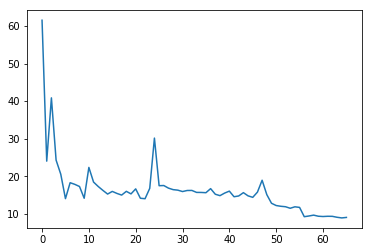

In [10]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

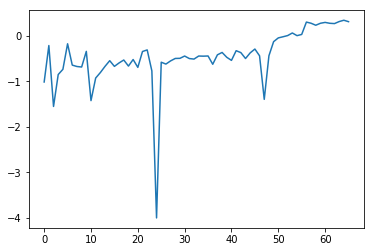

In [8]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)


In [12]:
max(r2s)

0.3423422109372254

In [17]:
r2s

[-2.3243963800559464,
 -5.122852718987301,
 -1.466225453086044,
 -0.9765732214368865,
 0.04131244740870532,
 -0.05741087802918754,
 -0.21335463841355584,
 -0.044777395479644655,
 0.020514438062677054,
 0.14775545095191123,
 -0.09843726146392595,
 0.0903747652054614,
 0.28604008081344,
 0.20765217756066245,
 0.2723283514588516,
 0.22319049829180637,
 0.2451910419534553,
 0.21236341277763426,
 0.30161277569223943,
 0.3465129756070603,
 0.35254771477960267,
 0.27478340419172265,
 0.2625933693915301,
 0.3497972083635482,
 0.3397104819858573,
 0.3469183890249389,
 0.36170864252864066,
 0.3260883969942254,
 0.40574149757735134,
 0.3272323686015437,
 -0.1736892263550447,
 -0.39244511728335274,
 0.06570195164843029,
 0.2441273048369964,
 0.25790235342469836,
 0.24597415275739953,
 0.2509308891626172,
 0.34613515806401063,
 0.3695159604058712,
 0.38139908855394056,
 0.3796616107914146,
 0.36876404375336835,
 0.36139120455344076,
 0.37522733502024297,
 0.38243218382087707,
 0.40324094695441537,


In [ ]:
max(r2s)

The Mean MAPE was about 13% for the linear models. They're also much faster.